In [1]:
%matplotlib inline
import pandas as pd
data = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv", header = 0, 
                  index_col = 0, parse_dates = True, na_values = -99.99)

In [2]:
cols = ['Lo 20', 'Hi 20']
data = data[cols] / 100
data.index = pd.to_datetime(data.index, format="%Y%m").to_period('M')

In [3]:
data.head()

,Lo 20,Hi 20
1926-07,-0.0057,0.0333
1926-08,0.0384,0.0233
1926-09,-0.0048,-0.0009
1926-10,-0.0329,-0.0295
1926-11,-0.0055,0.0316


In [4]:
n_months = data.shape[0]
annualized_return = (data+1).prod()**(12/n_months) - 1
annualized_return *= 100
annualized_return 

Lo 20    15.197701
Hi 20     9.849021
dtype: float64

In [5]:
data.std() * 12**0.5 *100

Lo 20    33.670128
Hi 20    19.511604
dtype: float64

In [6]:
n_months = data["1999":"2015"].shape[0]
annualized_return = (data["1999":"2015"]+1).prod()**(12/n_months) - 1
annualized_return *= 100
annualized_return 

Lo 20    11.442634
Hi 20     6.286512
dtype: float64

In [7]:
data["1999":"2015"].std() * 12**0.5 * 100

Lo 20    22.889447
Hi 20    17.271332
dtype: float64

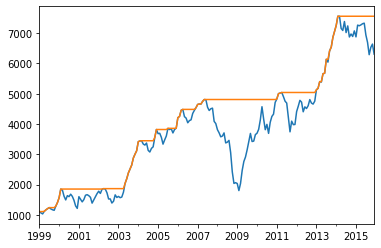

In [8]:
index_lo = 1000*(1+data["1999":"2015"]["Lo 20"]).cumprod()
index_hi = 1000*(1+ data["1999":"2015"]["Hi 20"]).cumprod()

index_lo.plot()
peaks_lo = index_lo.cummax()
peaks_lo.plot()

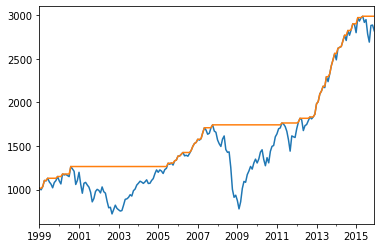

In [9]:
index_hi.plot()
peaks_hi = index_hi.cummax()
peaks_hi.plot()

55.27349978713653
2009-02


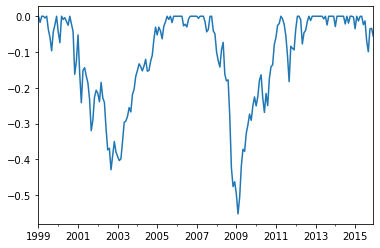

In [10]:
drawdown_hi = (index_hi - peaks_hi) / peaks_hi
drawdown_hi.plot()
print (drawdown_hi.min() * -100)
print (drawdown_hi.idxmin())

62.48092431236988
2009-02


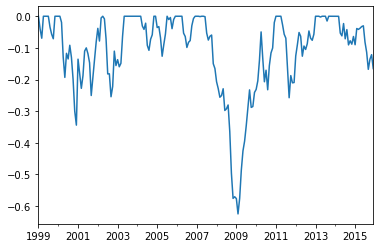

In [11]:
drawdown_lo = (index_lo - peaks_lo) / peaks_lo
drawdown_lo.plot()
print (drawdown_lo.min() * -100)
print (drawdown_lo.idxmin())

In [12]:
funds = pd.read_csv("edhec-hedgefundindices.csv", header = 0, index_col = 0, parse_dates = True)

In [13]:
funds["2000":].kurtosis()

Convertible Arbitrage     20.476005
CTA Global                -0.131541
Distressed Securities      3.330953
Emerging Markets           3.034022
Equity Market Neutral     17.744379
Event Driven               2.627274
Fixed Income Arbitrage    31.085539
Global Macro               0.694803
Long/Short Equity          1.532452
Merger Arbitrage           1.581726
Relative Value             9.975792
Short Selling              1.409938
Funds Of Funds             4.714240
dtype: float64

In [17]:
from scipy import stats

funds = funds["2009":]
print(stats.skew(funds))
print(min(stats.skew(funds)))

[ 1.30591093  0.05206195 -0.25494434  0.03312287 -0.89632731 -0.48882095
  1.12145348  0.34818394 -0.46370341 -0.55106451  0.15995286  0.45651822
 -0.64690778]
-0.8963273143673745


In [18]:
funds[funds<0].std(ddof=0)

Convertible Arbitrage     0.668103
CTA Global                1.099578
Distressed Securities     0.949845
Emerging Markets          1.527598
Equity Market Neutral     0.518610
Event Driven              1.013464
Fixed Income Arbitrage    0.332054
Global Macro              0.507508
Long/Short Equity         1.213857
Merger Arbitrage          0.361121
Relative Value            0.571123
Short Selling             2.124006
Funds Of Funds            0.794842
dtype: float64

In [19]:
print(max(funds[funds < 0].std(ddof=0)))
print(min(funds[funds < 0].std(ddof=0)))

2.1240060849462954
0.3320543832289375
